# **Banking Marketing Campaign data**

This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository. The dataset gives  information about a marketing campaign of a financial institution in which  will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

# Attribute Information:

## Input variables:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur',
'housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'second','tertiair','primary','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
8. balance: Balance of the individual
9. contact: contact communication type (categorical: 'cellular','telephone')
10. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
11. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
12. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
## Output variable (desired target):

17- y - has the client subscribed a term deposit? (binary: 'yes','no')

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing dataset**

In [2]:
df = pd.read_csv ("bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


# **EDA**

In [3]:
df.shape

(11162, 17)

In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [5]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [7]:
numeric_types = df.select_dtypes(exclude = np.object)
categorical_types = df.select_dtypes(exclude = np.int64)
cat_types = categorical_types.loc[:, categorical_types.columns != 'deposit']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


no     5873
yes    5289
Name: deposit, dtype: int64


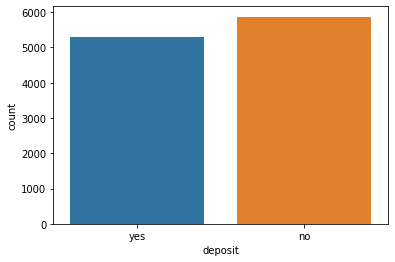

In [8]:
print(df['deposit'].value_counts())
sns.countplot(data=df,x= 'deposit')

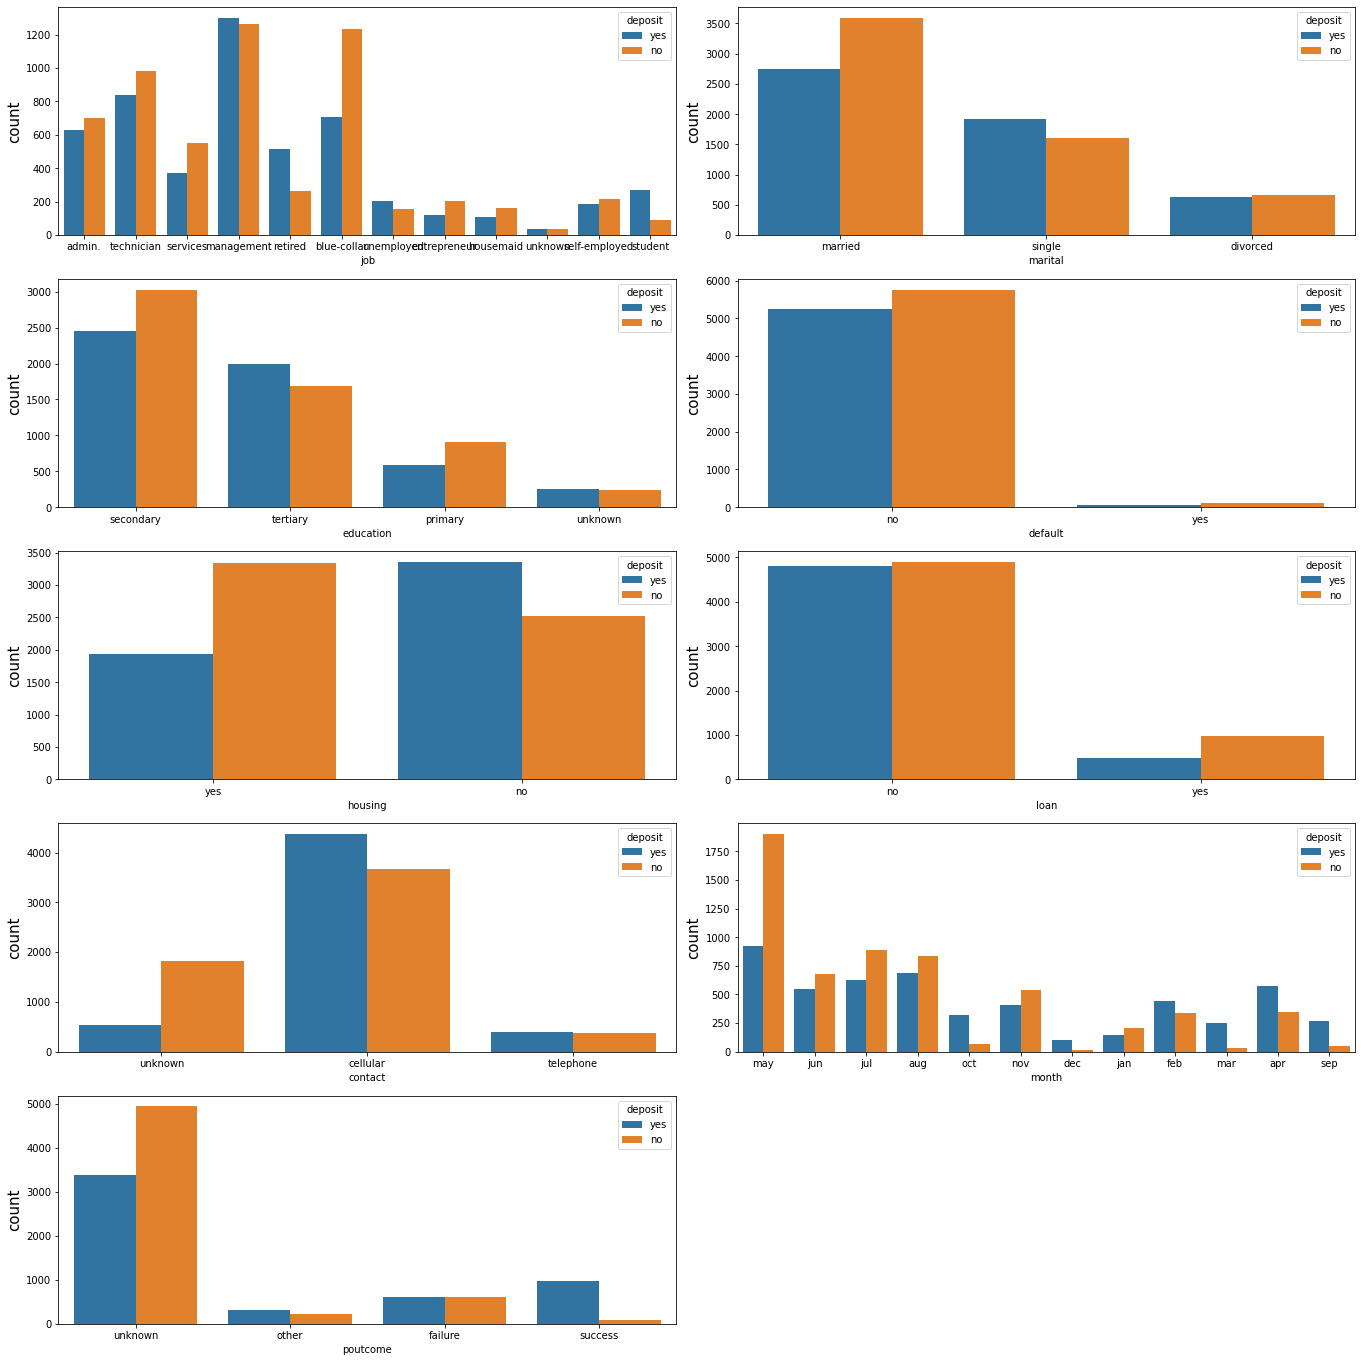

In [9]:
plt.figure(figsize=(19,19))
for index,column in enumerate(cat_types) :
    plt.subplot(5,2,index+1)
    sns.countplot(data=df,x=column, hue = "deposit")
    
    plt.ylabel("count", fontsize=15)

plt.tight_layout(pad = 1.0)
plt.show()

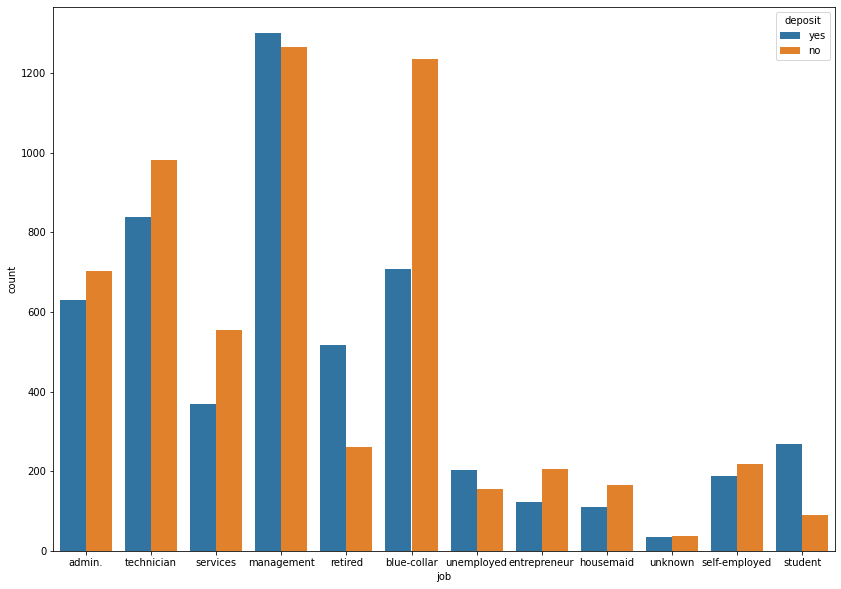

In [10]:
plt.figure(figsize=(14,10))
sns.countplot(data=df, x="job", hue = "deposit")

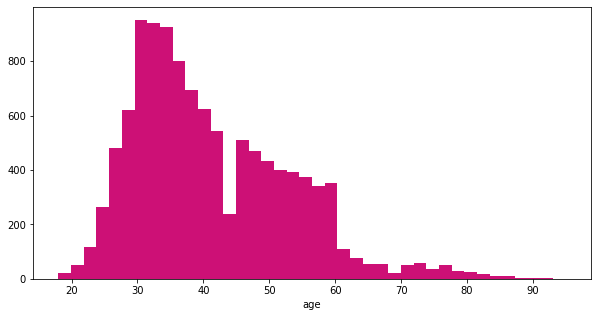

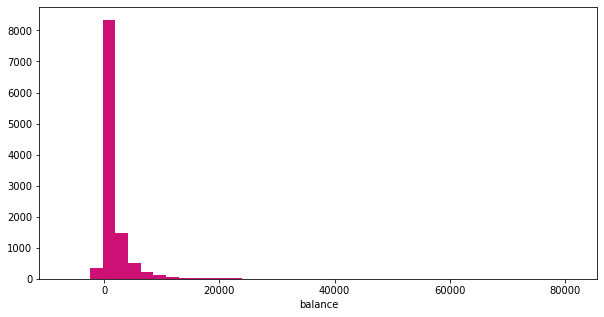

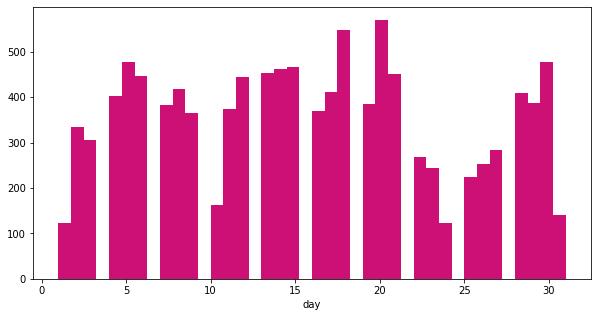

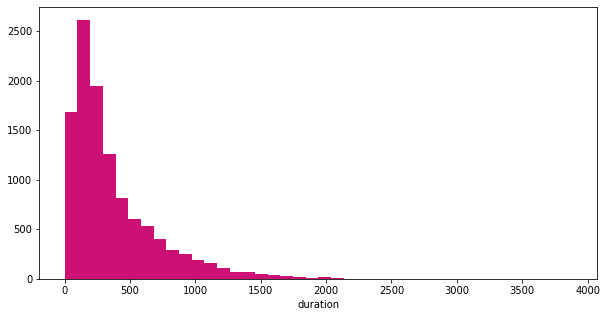

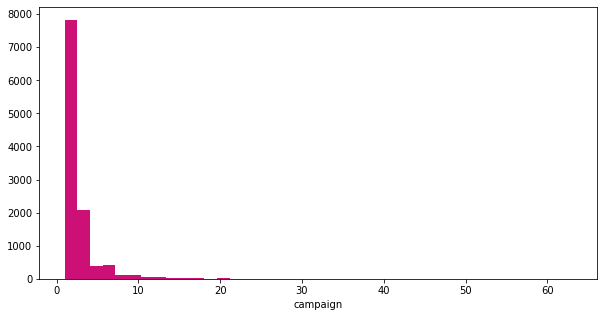

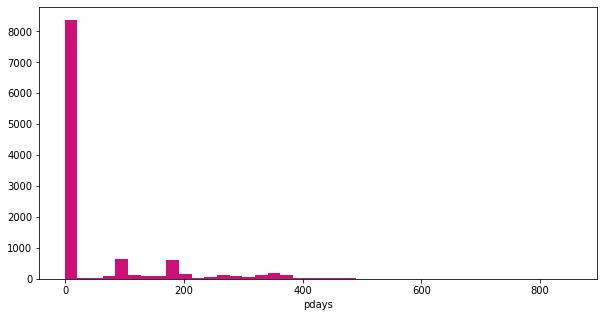

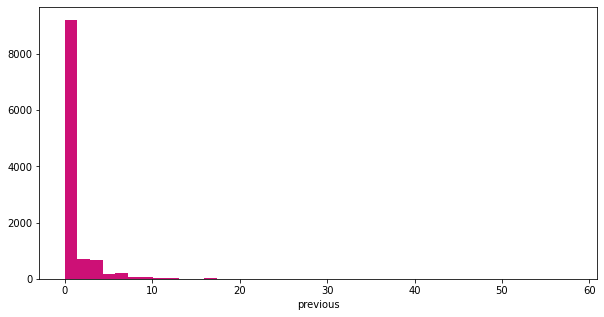

In [11]:
for a in  numeric_types: 
    plt.figure(figsize=(10,5))
    plt.hist(numeric_types[a], bins=40,color='#cd1076')
    plt.xlabel(a)
plt.show()

    #sns.displot(x = i,kde = True  ,color = "blue", hue = "deposit",data=df)

Text(0.5, 0, 'previous')

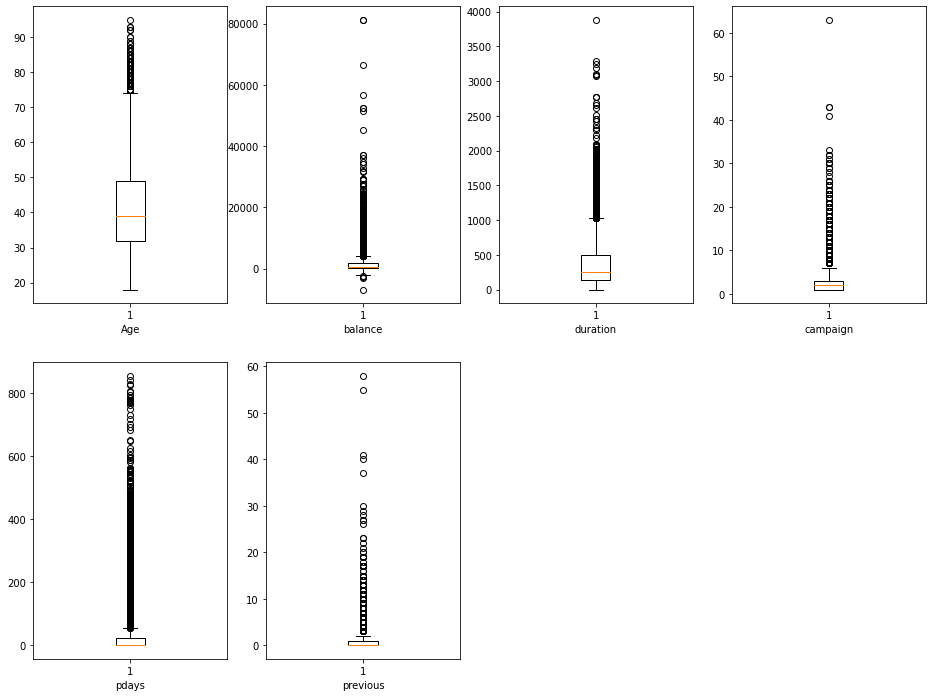

In [12]:
plt.figure(figsize =(16, 12))
plt.subplot(2,4,1)
plt.boxplot(df.age)
plt.xlabel("Age")
plt.subplot(2,4,2)
plt.boxplot(df.balance)
plt.xlabel("balance")
plt.subplot(2,4,3)
plt.boxplot(df.duration)
plt.xlabel("duration")
plt.subplot(2,4,4)
plt.boxplot(df.campaign)
plt.xlabel("campaign")
plt.subplot(2,4,5)
plt.boxplot(df.pdays)
plt.xlabel("pdays")
plt.subplot(2,4,6)
plt.boxplot(df.previous)
plt.xlabel("previous")

## Preprocessing

In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
enc = preprocessing.OneHotEncoder(handle_unknown='ignore')

In [14]:

df.marital = le.fit_transform(df.marital)
df.housing = le.fit_transform(df.housing)
df.deposit = le.fit_transform(df.deposit)
df.loan = le.fit_transform(df.loan)
df.default = le.fit_transform(df.default)

In [15]:
df['contact'].value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [16]:
df['contact'].replace("unknown","cellular", inplace=True ) 
df['education'].replace("unknown","secondary", inplace=True ) 


In [17]:
other_cat = ['job','education','contact','month','poutcome']
df = pd.get_dummies(df, columns = other_cat)

In [18]:
len(df.columns)

45

In [19]:
X=df.drop('deposit',axis=1)
y = df['deposit']


###### Splitting the dataset into the Training set and Test set

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Modelling

In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [22]:
model = Sequential()
# Adding the input layer and the first hidden layer (with dropout)
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 44)) 
model.add(Dropout(0.3)) # Disable 30% of the neurons on each iteration
model.add(BatchNormalization())

# Adding the second hidden layer (with dropout)
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu')) # input_dim already specified in previous hidden layer
model.add(Dropout(0.3)) # Disable 30% of the neurons on each iteration
model.add(BatchNormalization())

# Adding the third hidden layer (with dropout)
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu')) # input_dim already specified in previous hidden layer
model.add(Dropout(0.3)) # Disable 30% of the neurons on each iteration
model.add(BatchNormalization())

# Adding the output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid')) # only 1 node in output layer, use sigmoid function for probability



In [23]:
# Compiling the ANN - apply stochastic gradient descent
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) # loss defined this way since output is binary, only 1 output node

# Fitting the ANN to the Training set
history=model.fit(X_train, y_train, batch_size = 30, epochs = 40)  

Epoch 1/40
298/298 [==============================] - 5s 6ms/step - loss: 0.6219 - accuracy: 0.6758
Epoch 2/40
298/298 [==============================] - 2s 7ms/step - loss: 0.5829 - accuracy: 0.7067
Epoch 3/40
298/298 [==============================] - 2s 7ms/step - loss: 0.5695 - accuracy: 0.7125
Epoch 4/40
298/298 [==============================] - 2s 5ms/step - loss: 0.5684 - accuracy: 0.7173
Epoch 5/40
298/298 [==============================] - 1s 5ms/step - loss: 0.5632 - accuracy: 0.7206
Epoch 6/40
298/298 [==============================] - 2s 5ms/step - loss: 0.5578 - accuracy: 0.7249
Epoch 7/40
298/298 [==============================] - 1s 3ms/step - loss: 0.5524 - accuracy: 0.7286
Epoch 8/40
298/298 [==============================] - 1s 3ms/step - loss: 0.5601 - accuracy: 0.7224
Epoch 9/40
298/298 [==============================] - 1s 3ms/step - loss: 0.5479 - accuracy: 0.7396
Epoch 10/40
298/298 [==============================] - 1s 3ms/step - loss: 0.5516 - accuracy: 0.7311

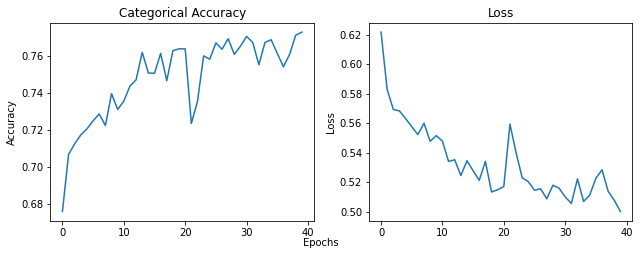

In [24]:
fig_w, fig_h = (4.5, 3.5)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})
fig, axs = plt.subplots(1, 2, figsize=(2*fig_w,fig_h))

plt.sca(axs[0])
plt.plot(history.history['accuracy'])

plt.ylabel('Accuracy')
plt.title('Categorical Accuracy')

plt.sca(axs[1])
plt.plot(history.history['loss'])
plt.ylabel('Loss')
plt.title('Loss')

plt.tight_layout()
fig.text(0.5, 0.01,'Epochs', ha='center')
plt.show()

In [28]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) # Set threshold for returning true or false

70/70 [==============================] - 0s 3ms/step


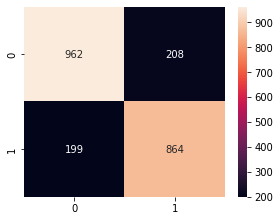

In [29]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
f = sns.heatmap(cm, annot=True, fmt='d')
